# Example code to apply the modular splicing model

Example test variants come from ClinVar BRCA1 variants

## Splicing delta PSI prediction

In [12]:
from mmsplice.vcf_dataloader import SplicingVCFDataloader
from mmsplice import MMSplice, predict_all_table, predict_save
from mmsplice.utils import max_varEff

In [2]:
gtf = '../tests/data/test.gtf'
vcf = '../tests/data/test.vcf.gz'
fasta = '../tests/data/hg19.nochr.chr17.fa'

In [3]:
dl = SplicingVCFDataloader(gtf, fasta, vcf, encode=False, split_seq=True)

In [4]:
next(dl)

{'inputs': {'seq': {'acceptor_intron': 'CCTAAGAACTCATACAACCAGGACCCTGGAGTCGATTGATTAGAGCCTAGTCCAGGAGAATGAATTGACACTAATCTCTGCTTGTGTTCTCTGT',
   'acceptor': 'TCCAGGAGAATGAATTGACACTAATCTCTGCTTGTGTTCTCTGTCTCCAGCAA',
   'exon': 'CAATTGGGCAGATGTGTGAGGCACCTGTGGTGACCCGAGAGTGGGTGTTGGACAGTGTAGCACTCTACCAGTGCCAGGAGCTGGACACCTACCTGATACCCCAGATCCCCCACAGCCACTACTGACTGCAGCCAGCCACAGGTACAGAGCCACAGGACCCCAAGAATGAGCTTACAAAGTGGCCTTTCCAGGCCCTGGGAGCTCCTCTCACTCTTCAGTCCTTCTACTGTCCTGGCTACTAAATATTTTATGTACATCAGCCTGAAAAGGACTTCTGGCTATGCAAGGGTCCCTTAAAGATTTTCTGCTTGAAGTCTCCCTTGGAAATCTGCCATGAGCACAAAATTATGGTAATTTTTCACCTGAGAAGATTTTAAAACCATTTAAACGCCACCAATTGAGCAAGATGCTGATTCATTATTTATCAGCCCTATTCTTTCTATTCAGGCTGTTGTTGGCTTAGGGCTGGAAGCACAGAGTGGCTTGGCCTCAAGAGAATAGCTGGTTTCCCTAAGTTTACTTCTCTAAAACCCTGTGTTCACAAAGGCAGAGAGTCAGACCCTTCAATGGAAGGAGAGTGCTTGGGATCGATTATGTGACTTAAAGTCAGAATAGTCCTTGGGCAGTTCTCAAATGTTGGAGTGGAACATTGGGGAGGAAATTCTGAGGCAGGTATTAGAAATGAAAAGGAAACTTGAAACCTGGGCATGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGCAGATCACTGGAGGTCAGGAGTTC

In [13]:
model = MMSplice()

/home/muhammedhasan/Projects/MMSplice/venv/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
dl = SplicingVCFDataloader(gtf, fasta, vcf)

predictions = predict_all_table(model, dl, pathogenicity=True, splicing_efficiency=True)

4it [00:13,  2.99s/it]


In [7]:
predictionsMax = max_varEff(predictions)

In [8]:
predictionsMax.sort_values(['delta_logit_psi']).head()

,ID,delta_logit_psi,exons,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
717,17:41251568:GTGAGCCACCATGCCTGGCCTCTTTTGCTCCCTT...,-13.142139,17:41251791-41251894:-,-2.928739,1.003448,-3.000968,2.998045,0.683019,-3.894215,-5.617308,-1.16161,-4.262197,0.008081,1.0,-7.652236
323,17:41219540:CGATTACAGGCATGCGCCACCGTGCCTCGCCTCA...,-12.980691,17:41219624-41219712:-,-2.256955,4.854000,-4.449435,2.749682,0.218514,-2.898835,-6.655025,-1.16161,-3.431215,-0.198021,1.0,-6.342944
503,17:41232465:TGGCCTCCCAAAGTGCTGGGGTTACAGGCGTGAG...,-12.446247,17:41234420-41234592:-,-2.337047,0.198098,-3.064758,3.751723,0.509226,-3.498240,-5.302096,-1.16161,-2.475021,-0.310342,1.0,-5.989502
681,17:41248754:ATTTTCATCAGTCACAATTACTGCTGTGTCAATA...,-11.353837,17:41249260-41249306:-,-2.896458,0.525802,-3.411850,4.421351,0.797147,-3.806159,-6.966350,-1.16161,-3.872047,0.715352,1.0,-8.457780
539,17:41242891:GTGGGATACATACTACTGAATGCAAAGGACACCA...,-11.322243,17:41242960-41243049:-,-3.370246,4.042363,-3.705677,3.972384,0.524251,-2.947957,-5.811146,-1.16161,-4.428016,0.385194,1.0,-9.122525


If mmsplice `deltalogitPSI` of a variant is bigger than 2 or smaller -2 if is likely to have effect on splicing.

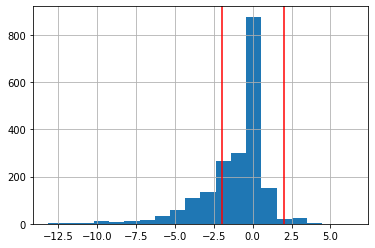

In [9]:
import matplotlib.pyplot as plt

plt.axvline(x=2, color='r')
plt.axvline(x=-2, color='r')

predictions['delta_logit_psi'].hist(bins=20)

For huge vcf files, output is writen to csv file on batch predictions.

In [10]:
dl = SplicingVCFDataloader(gtf, fasta, vcf)
predict_save(model, dl, output_csv='pred.csv', pathogenicity=True, splicing_efficiency=True)

4it [00:12,  2.80s/it]


In [11]:
! head pred.csv

ID,exons,delta_logit_psi,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
17:41197805:ACATCTGCC:['A'],17:41196311-41197819:-,-0.3074603232906171,-2.9240594,5.0689387,-4.191132,-3.1975443,0.10508263,-2.9240594,5.0689387,-4.212151,-3.584379,0.10508263,0.972476113377728,-0.5597015069789752
17:41197805:ACATCTGCC:['A'],17:41196312-41197819:-,-0.15589666909537683,-2.9240594,5.0689387,-4.190762,-2.977995,0.10508263,-2.9240594,5.0689387,-4.2086678,-3.1663177,0.10508263,0.9484773530212034,-0.3474528416754708
17:41197805:ACATCTGCC:['A'],17:41196821-41197819:-,-0.8039740952751052,-2.9240594,5.0689387,-3.8693066,-2.1827195,0.10508263,-2.9240594,5.0689387,-3.857884,-3.2683797,0.10508263,0.992388313731282,-1.238352651735897
17:41197805:ACATCTGCC:['A'],17:41197579-41197819:-,-0.05815466856165973,-2.9240594,5.0689387,-3.507481,-3.032851,0.10508263,-2.9240594,5.0689387,-3.5461497,-3.067249,0.10